In [1]:
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from utilities.visualisation import DataFrameVisualization, PatchesAndDataframeVisualization

/home/francesco/.local/lib/python3.6/site-packages/skimage/novice/__init__.py:103: UserWarning: The `skimage.novice` module was deprecated in version 0.14. It will be removed in 0.16.
  warnings.warn("The `skimage.novice` module was deprecated in version 0.14. "


In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
%%html
<style>

div.output_scroll {
    height : auto;
}
</style>

## Find the correct treshold
In order to find a correct treshold to label the data, we first look at the mean advancement in the flat ground and then we half it to take into account slopes and ramps 

In [4]:
def find_tr(df):
    return df['advancement'].mean() / 2

In [7]:
from utilities.postprocessing.postprocessing import AddAdvancement
import pandas as pd
import glob 

seconds = np.arange(1, 5)
RATE = 50

def show_tr(seconds):
    dfs = [pd.read_csv(path) for path in glob.glob('/media/francesco/saetta/krock-dataset/flat/csvs_patches/*.csv')]
    window = RATE * seconds
    print('[INFO] window = {}'.format(window))
    add_adv = AddAdvancement(window)
    
    dfs = [add_adv((df, None, None))[0] for df in dfs]
    vis = DataFrameVisualization.from_dfs(dfs)
    vis.plot_advancement_box()
    print(vis.df['advancement'].mean())
    print(find_tr(vis.df))
    
interact(show_tr, seconds=seconds)

interactive(children=(Dropdown(description='seconds', options=(1, 2, 3, 4), value=1), Output()), _dom_classes=…

<function __main__.show_tr(seconds)>

<IPython.core.display.Javascript object>


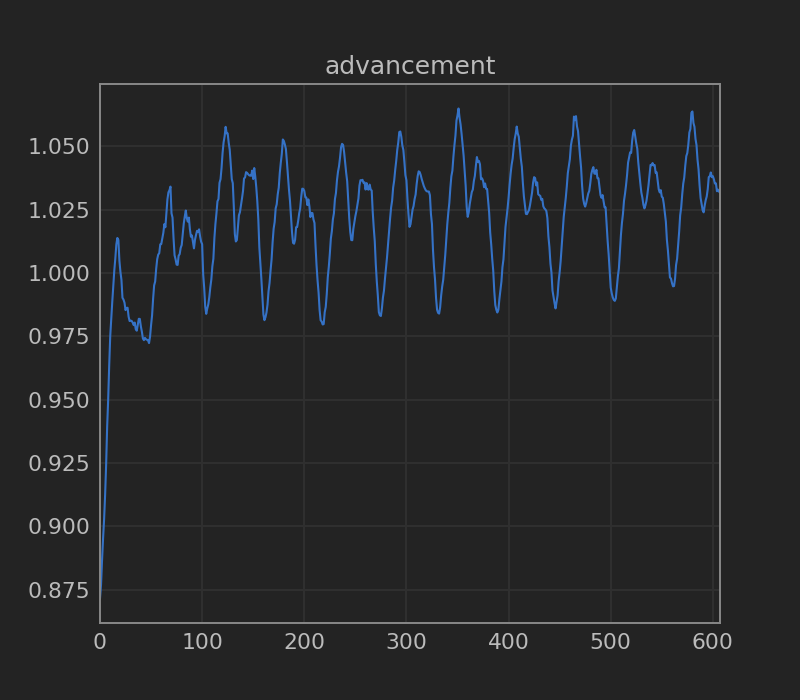

<IPython.core.display.Javascript object>


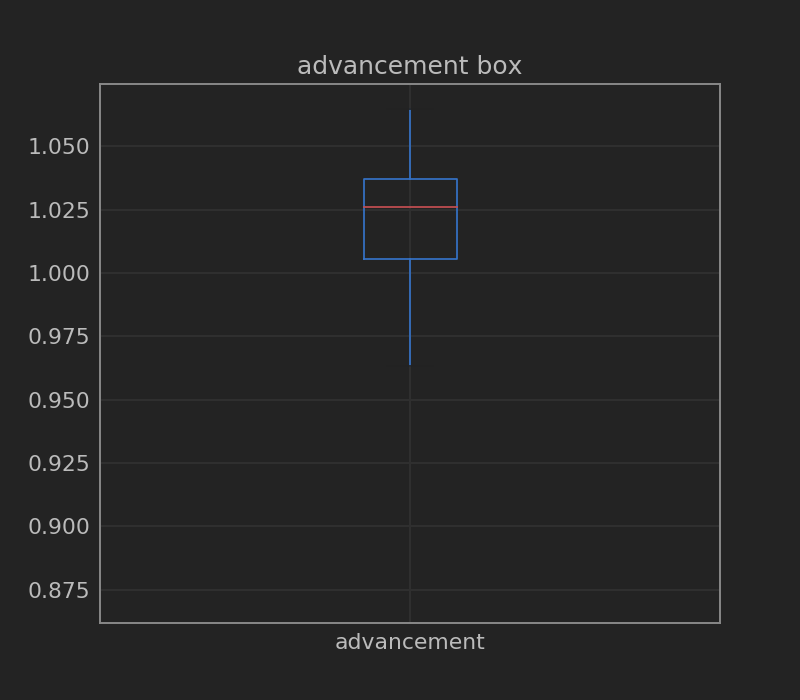

<IPython.core.display.Javascript object>


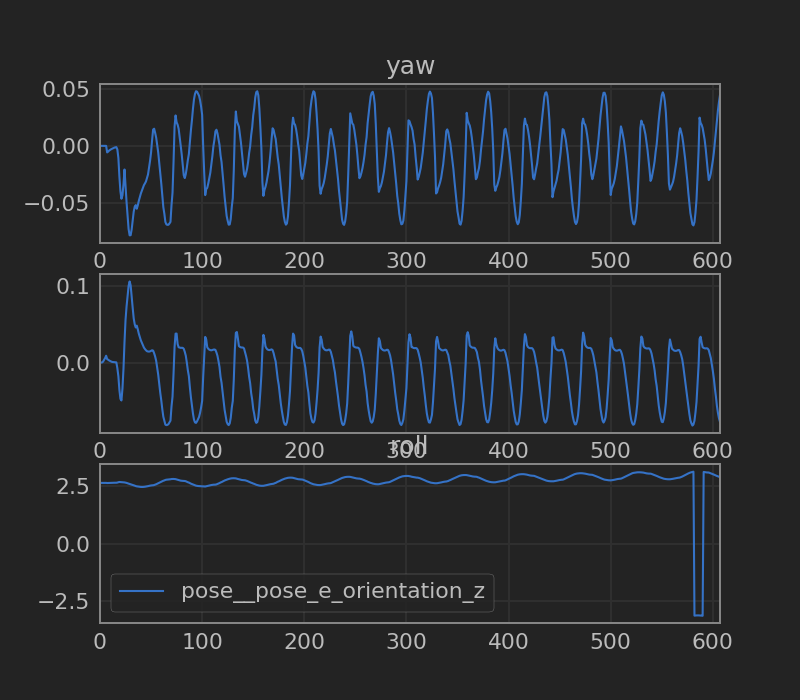

<IPython.core.display.Javascript object>


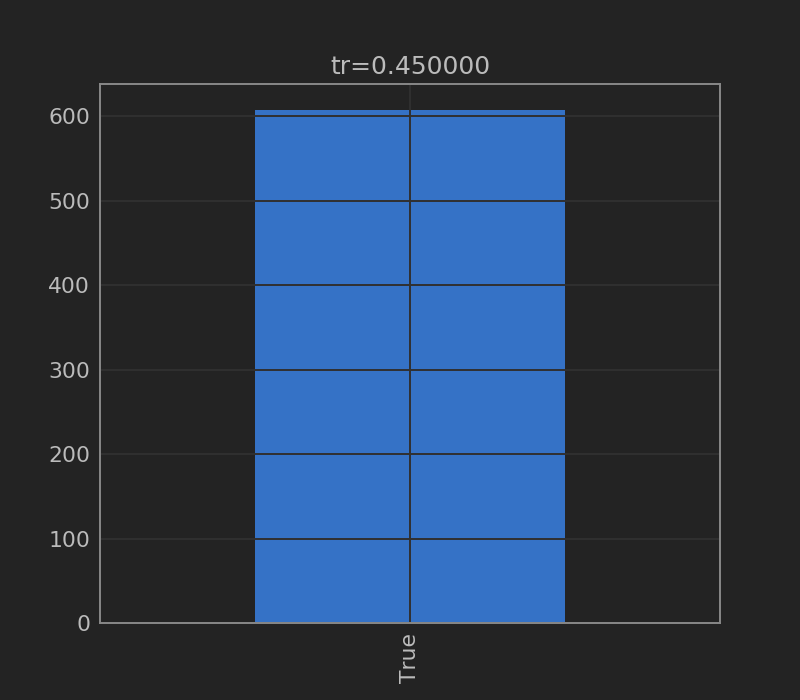

In [29]:
dfs = [pd.read_csv(path) for path in glob.glob('/media/francesco/saetta/krock-dataset/flat/csvs_patches/*.csv')]

df = AddAdvancement(50 * 3)((dfs[0], None, None))[0]
DataFrameVisualization(df)(tr=0.45)

In [11]:
flat_ground_vis = DataFrameVisualization.from_root('/media/francesco/saetta/krock-dataset/flat/csvs_patches/')

<IPython.core.display.Javascript object>


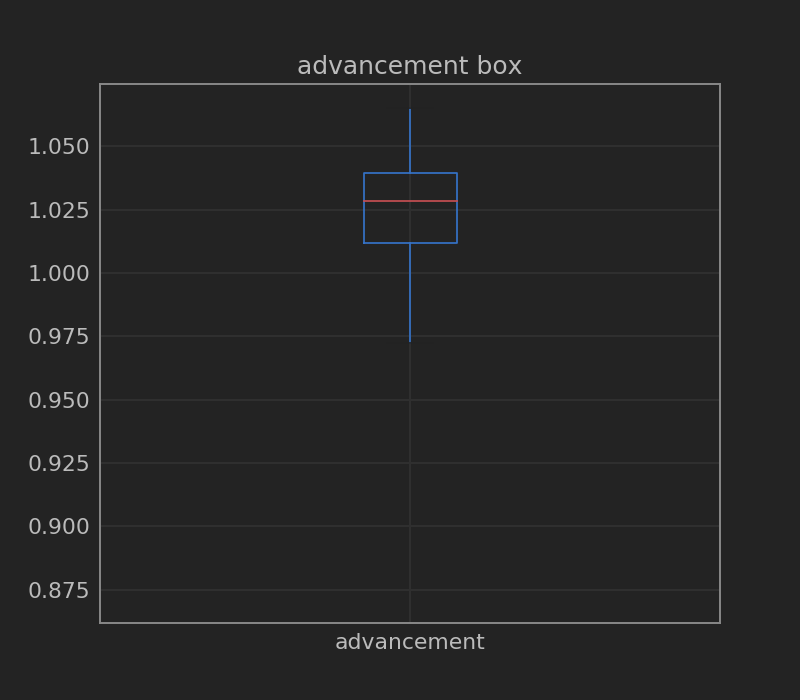

tr is 0.513


In [12]:
flat_ground_vis.plot_advancement_box()

tr = find_tr(flat_ground_vis.df)

print('tr is {:.3f}'.format(tr))

# Visualize the simulation
Visualize the robot's simulation on a specific map is tremendously useful to understand if everything went perfect. Also, we can have an idea about the generated dataset. 

We can start by plotting interestig stats for each dataset, train, val and test

In [7]:
TR = 0.2

In [8]:
DATASETS = ('/media/francesco/saetta/krock-dataset/train/', 
           '/media/francesco/saetta/krock-dataset/train/',
           '/media/francesco/saetta/krock-dataset/test/')

In [9]:
visualizations = [DataFrameVisualization.from_root(ds + '/csvs_patches') for ds in DATASETS]
visualizations = {'train' : visualizations[0], 'val' : visualizations[1], 'test': visualizations[2]}

## Train

<IPython.core.display.Javascript object>


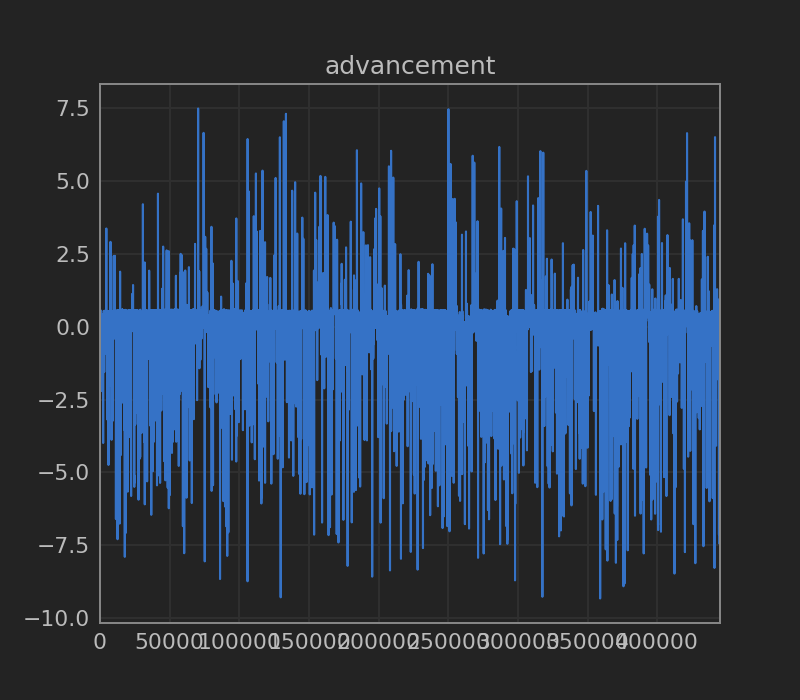

<IPython.core.display.Javascript object>


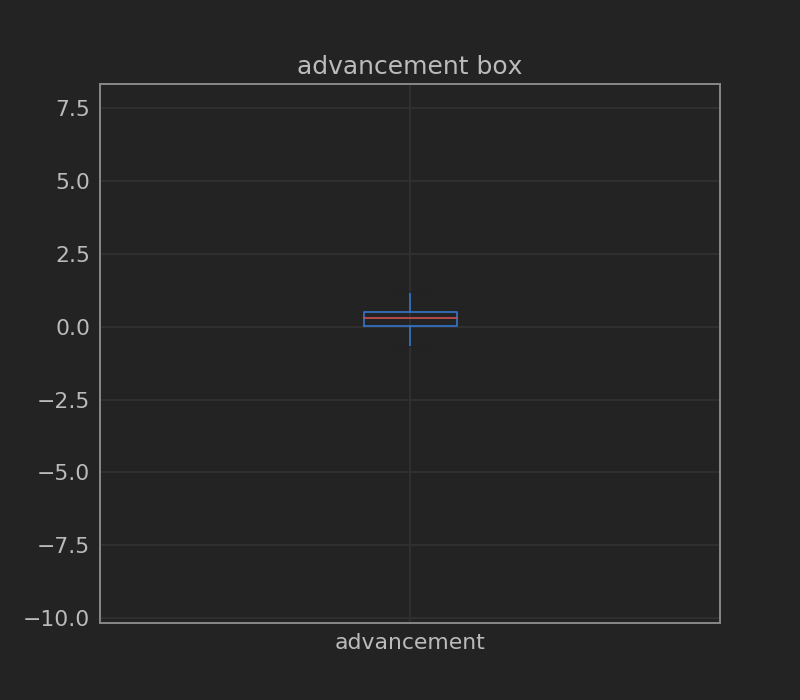

<IPython.core.display.Javascript object>


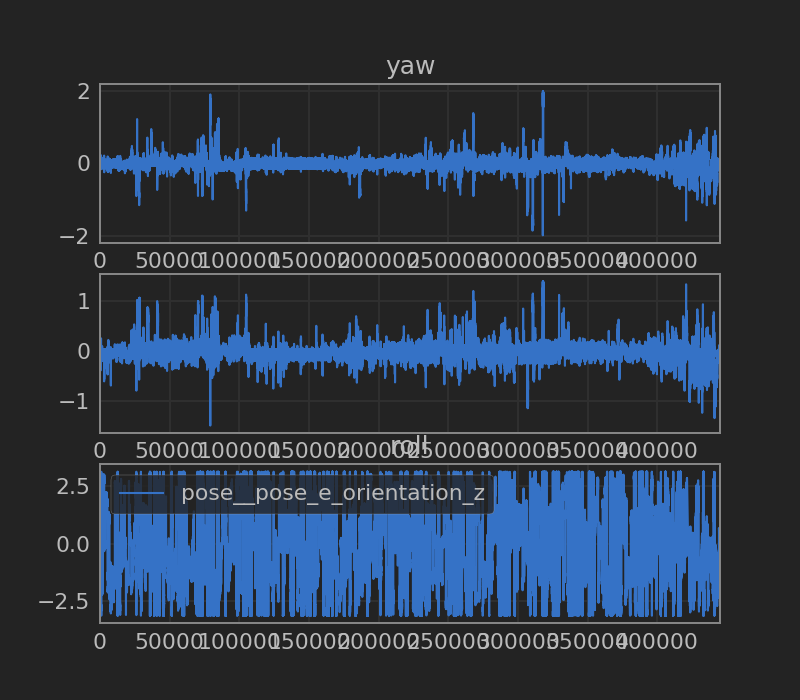

<IPython.core.display.Javascript object>


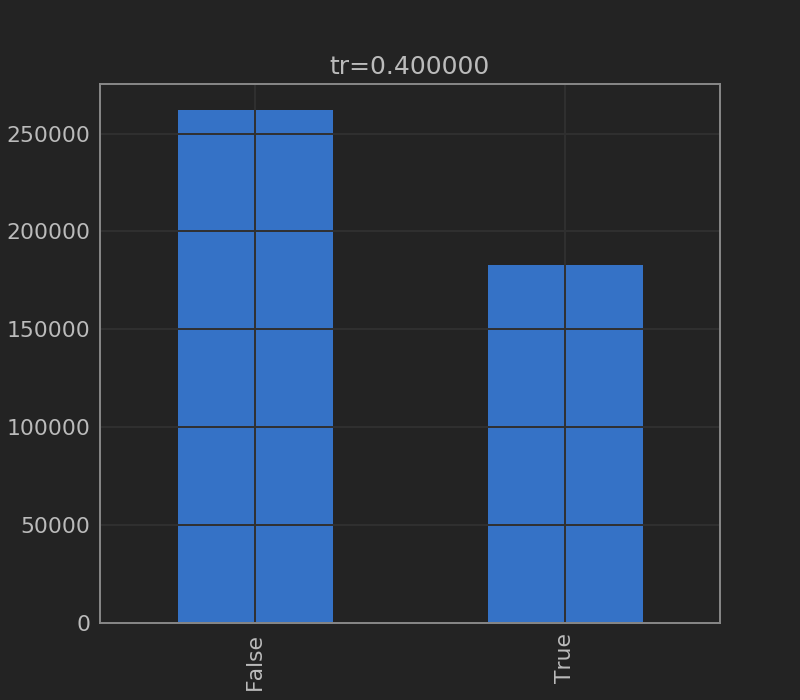

In [13]:
visualizations['train'](tr=TR, time_window=75)

<IPython.core.display.Javascript object>


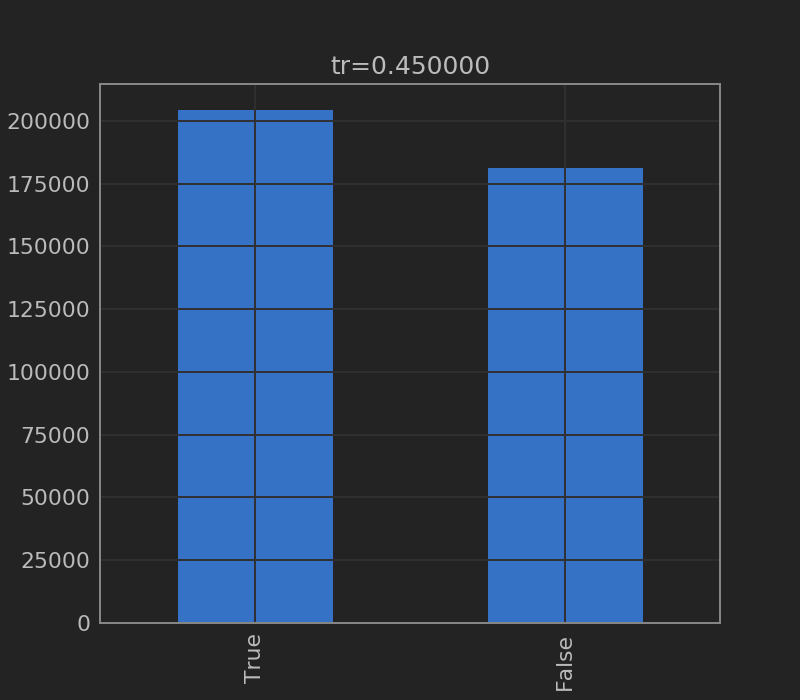

<IPython.core.display.Javascript object>


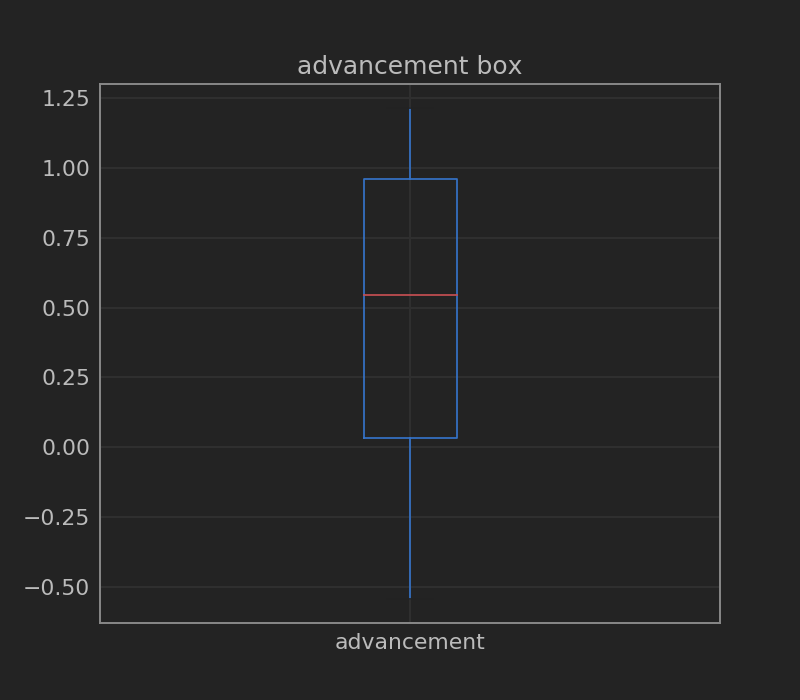

In [10]:
visualizations['train'].show_classes(TR)
visualizations['train'].plot_advancement_box()

## Val

<IPython.core.display.Javascript object>


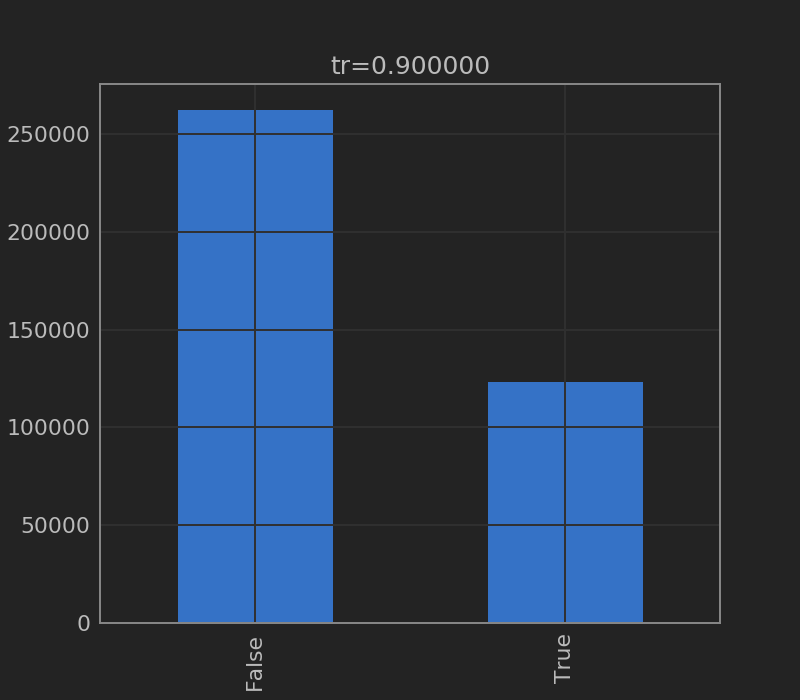

<IPython.core.display.Javascript object>


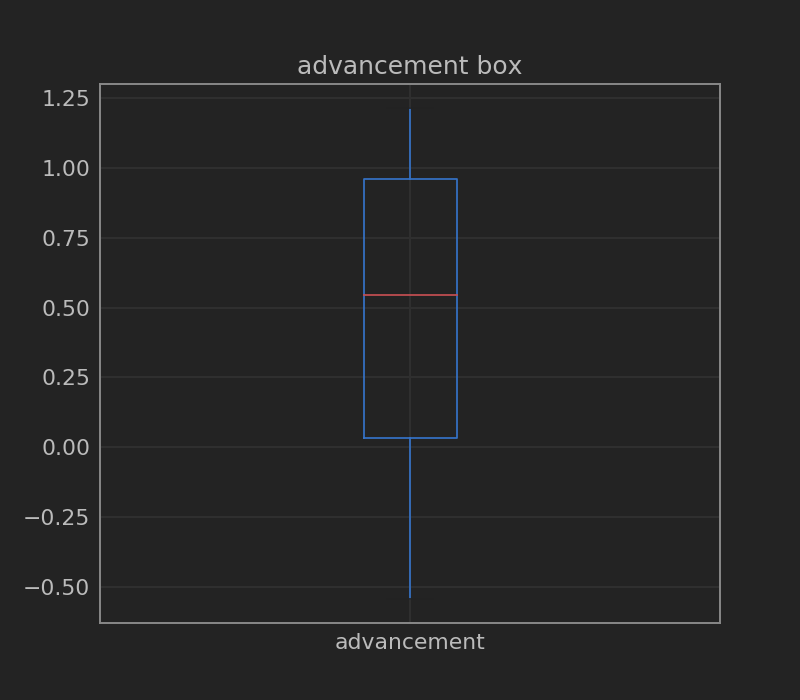

In [62]:
visualizations['val'].show_classes(TR)
visualizations['val'].plot_advancement_box()

## Test

<IPython.core.display.Javascript object>


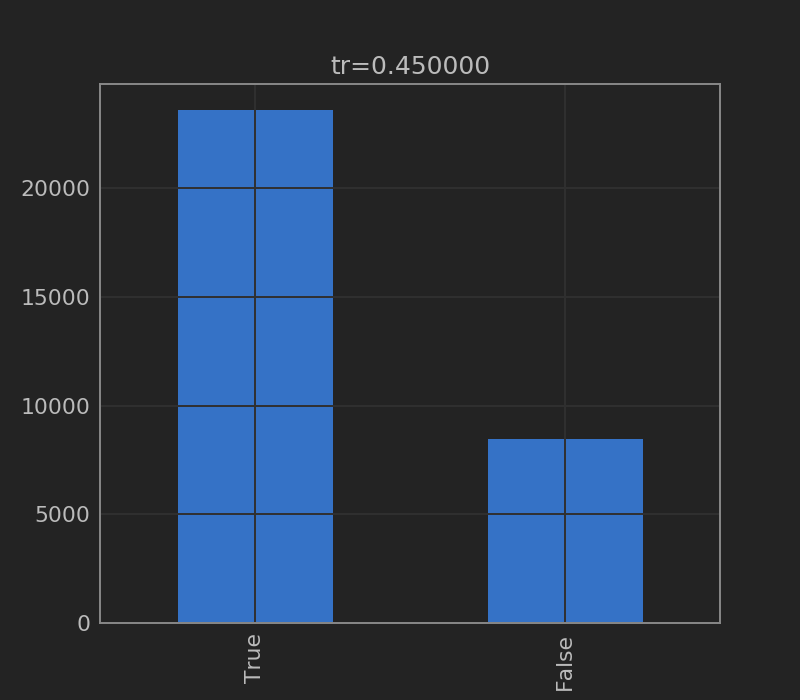

<IPython.core.display.Javascript object>


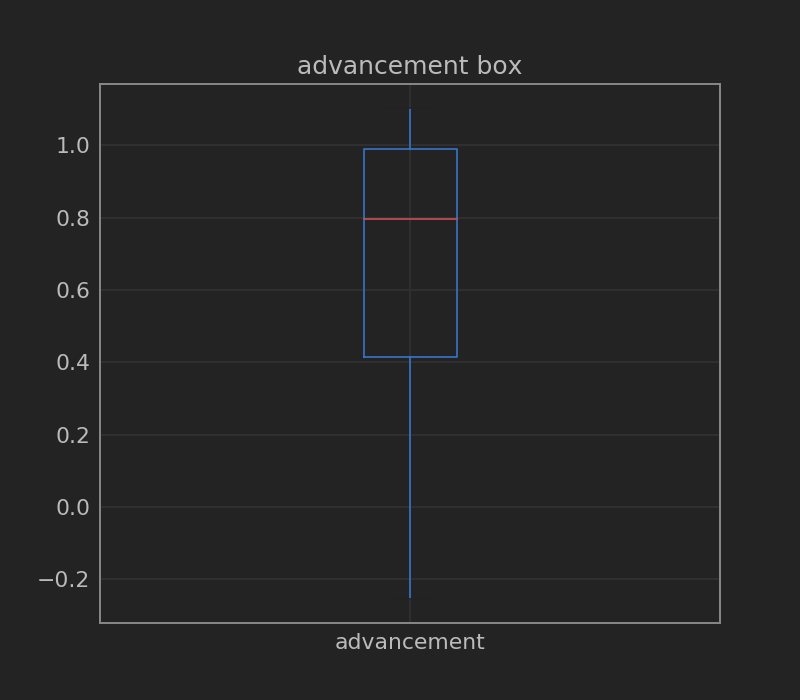

In [11]:
visualizations['test'].show_classes(TR)
visualizations['test'].plot_advancement_box()

### Classes Balance
We can also show different classes separation for different tr choices

In [ ]:
trs = np.arange(0.1,1,0.1)

def plot_classes_distribution(tr, mode):
    visualizations[mode].show_classes(tr)
    
    
interact(plot_classes_distribution, tr=trs, mode=['train', 'val', 'test'])


If we pick up a very permissive tr of 0.1 we can notice that the class balance is still very similar to the one with tr = 0.4/5. This means that most of the False cases are with tr close to 0.

### Patches

We can shows the robot traces and some patches for some specific simulations. This helps to debug the pipeline

In [ ]:
HM_DIR = '/home/francesco/Documents/Master-Thesis/core/maps/'

In [ ]:
tmp = PatchesAndDataframeVisualization.from_df_path('/media/francesco/saetta/quarry-ramp/from_flat_to_ramp/df/querry-big-10/1555314971.4928784-patch.csv', 
                                                    HM_DIR, 
                                                    image_dir='/media/francesco/saetta/quarry-ramp/from_flat_to_ramp')

In [ ]:
tmp.show_classes(tr=TR)
tmp.show_patches_on_the_map()

In [ ]:
bars1_vis = PatchesAndDataframeVisualization.from_df_path('/media/francesco/saetta/no-shift-88-750/train/df/bars1/1550615138.5778086-patch.csv',
                                                         HM_DIR,
                                                         image_dir='/media/francesco/saetta/no-shift-88-750/train')

In [ ]:
bars1_vis.show_patches_on_the_map()

In [ ]:
bars1_vis.show_patches()

In [7]:
import pandas as pd
import cv2

In [169]:
meta = pd.read_csv('/media/francesco/saetta/krock-dataset/train/bags/meta.csv')

In [18]:
# meta = meta.drop(meta[(meta['map'] == 'slope_rocks1') & (meta['height'] == 1)].index)
# meta = meta[meta['height'] == 1]
meta = meta[meta['map'] == 'slope_rocks1']

dfs = [pd.read_csv('/media/francesco/saetta/krock-dataset/train/csvs_patches/{}.csv'.format(name))
      for name in meta['filename']]

meta

Unnamed: 0             filename           map  height
300         300   slope_rocks1-1.0-0  slope_rocks1     1.0
301         301   slope_rocks1-1.0-1  slope_rocks1     1.0
302         302   slope_rocks1-1.0-2  slope_rocks1     1.0
303         303   slope_rocks1-1.0-3  slope_rocks1     1.0
304         304   slope_rocks1-1.0-4  slope_rocks1     1.0
305         305   slope_rocks1-1.0-5  slope_rocks1     1.0
306         306   slope_rocks1-1.0-6  slope_rocks1     1.0
307         307   slope_rocks1-1.0-7  slope_rocks1     1.0
308         308   slope_rocks1-1.0-8  slope_rocks1     1.0
309         309   slope_rocks1-1.0-9  slope_rocks1     1.0
310         310  slope_rocks1-1.0-10  slope_rocks1     1.0
311         311  slope_rocks1-1.0-11  slope_rocks1     1.0
312         312  slope_rocks1-1.0-12  slope_rocks1     1.0
313         313  slope_rocks1-1.0-13  slope_rocks1     1.0
314         314  slope_rocks1-1.0-14  slope_rocks1     1.0
315         315  slope_rocks1-1.0-15  slope_rocks1     1.0
316         316  slope_rocks1-1.0-16  slope_rocks1     1.0
317         317  slope_rocks1-1.0-17  slope_rocks1     1.0
318         318  slope_rocks1-1.0-18  slope_rocks1     1.0
319         319  slope_rocks1-1.0-19  slope_rocks1     1.0
320         320  slope_rocks1-1.0-20  slope_rocks1     1.0
321         321  slope_rocks1-1.0-21  slope_rocks1     1.0
322         322  slope_rocks1-1.0-22  slope_rocks1     1.0
323         323  slope_rocks1-1.0-23  slope_rocks1     1.0
324         324  slope_rocks1-1.0-24  slope_rocks1     1.0
325         325  slope_rocks1-1.0-25  slope_rocks1     1.0
326         326  slope_rocks1-1.0-26  slope_rocks1     1.0
327         327  slope_rocks1-1.0-27  slope_rocks1     1.0
328         328  slope_rocks1-1.0-28  slope_rocks1     1.0
329         329  slope_rocks1-1.0-29  slope_rocks1     1.0
..          ...                  ...           ...     ...
881         881   slope_rocks1-7.0-0  slope_rocks1     7.0
882         882   slope_rocks1-7.0-1  slope_rocks1     7.0
883         883   slope_rocks1-7.0-2  slope_rocks1     7.0
884         884   slope_rocks1-7.0-3  slope_rocks1     7.0
885         885   slope_rocks1-7.0-4  slope_rocks1     7.0
886         886   slope_rocks1-7.0-5  slope_rocks1     7.0
887         887   slope_rocks1-7.0-6  slope_rocks1     7.0
888         888   slope_rocks1-7.0-7  slope_rocks1     7.0
889         889   slope_rocks1-7.0-8  slope_rocks1     7.0
890         890   slope_rocks1-7.0-9  slope_rocks1     7.0
891         891  slope_rocks1-7.0-10  slope_rocks1     7.0
892         892  slope_rocks1-7.0-11  slope_rocks1     7.0
893         893  slope_rocks1-7.0-12  slope_rocks1     7.0
894         894  slope_rocks1-7.0-13  slope_rocks1     7.0
895         895  slope_rocks1-7.0-14  slope_rocks1     7.0
896         896  slope_rocks1-7.0-15  slope_rocks1     7.0
897         897  slope_rocks1-7.0-16  slope_rocks1     7.0
898         898  slope_rocks1-7.0-17  slope_rocks1     7.0
899         899  slope_rocks1-7.0-18  slope_rocks1     7.0
900         900  slope_rocks1-7.0-19  slope_rocks1     7.0
901         901  slope_rocks1-7.0-20  slope_rocks1     7.0
902         902  slope_rocks1-7.0-21  slope_rocks1     7.0
903         903  slope_rocks1-7.0-22  slope_rocks1     7.0
904         904  slope_rocks1-7.0-23  slope_rocks1     7.0
905         905  slope_rocks1-7.0-24  slope_rocks1     7.0
906         906  slope_rocks1-7.0-25  slope_rocks1     7.0
907         907  slope_rocks1-7.0-26  slope_rocks1     7.0
908         908  slope_rocks1-7.0-27  slope_rocks1     7.0
909         909  slope_rocks1-7.0-28  slope_rocks1     7.0
910         910  slope_rocks1-7.0-29  slope_rocks1     7.0

[190 rows x 4 columns]

<IPython.core.display.Javascript object>


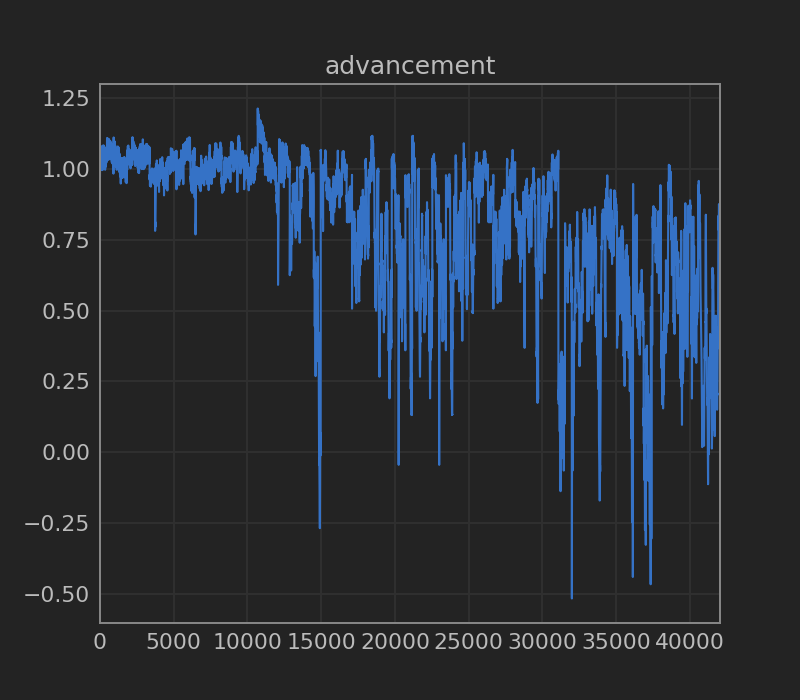

<IPython.core.display.Javascript object>


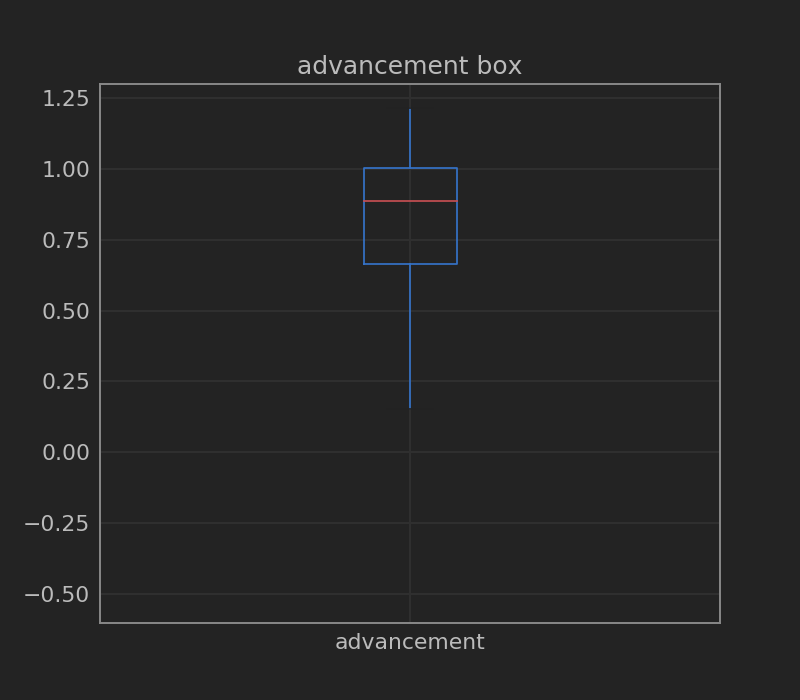

<IPython.core.display.Javascript object>


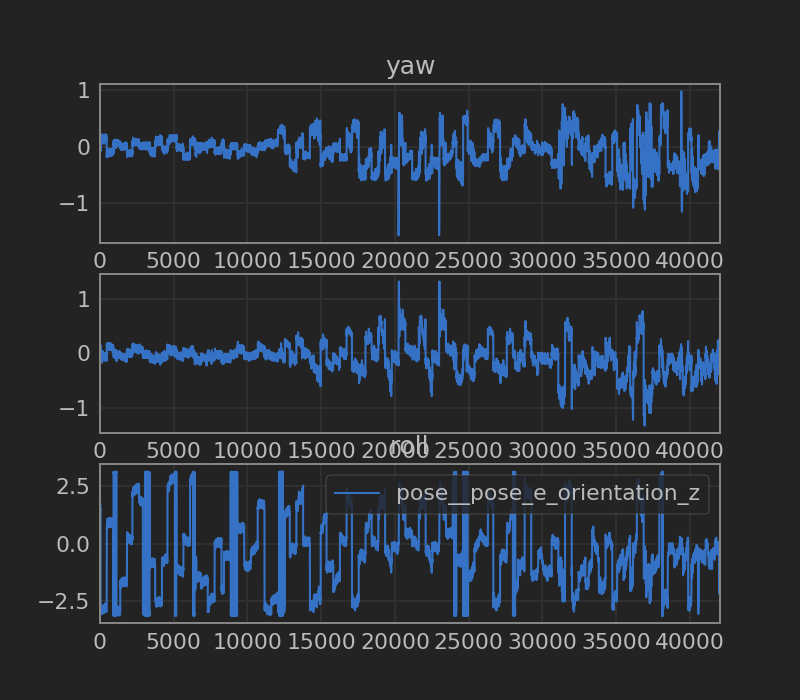

<IPython.core.display.Javascript object>


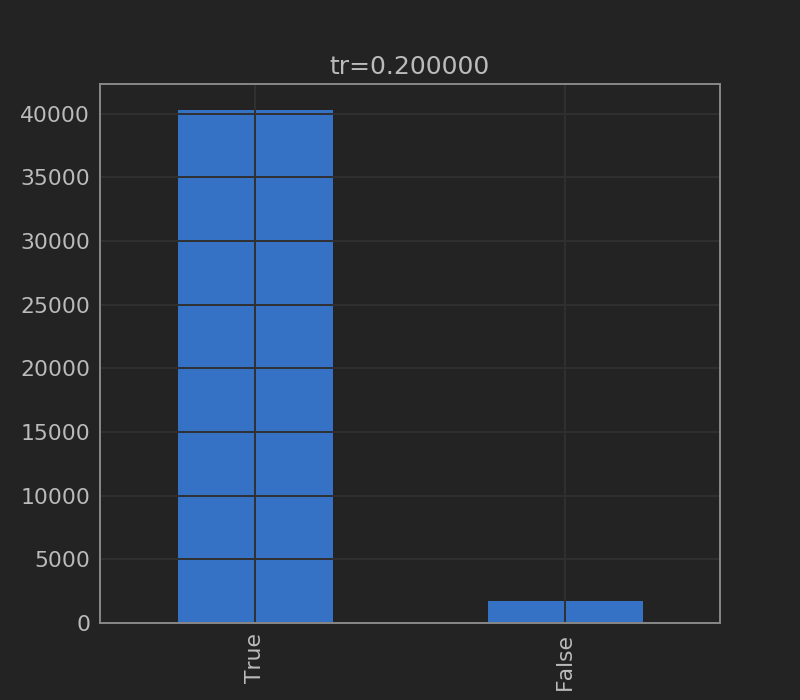

In [22]:
add_adv = AddAdvancement(150)

dfs = [add_adv((df, None, None))[0] for df in dfs]
vis = DataFrameVisualization.from_dfs(dfs)(0.2)

<IPython.core.display.Javascript object>


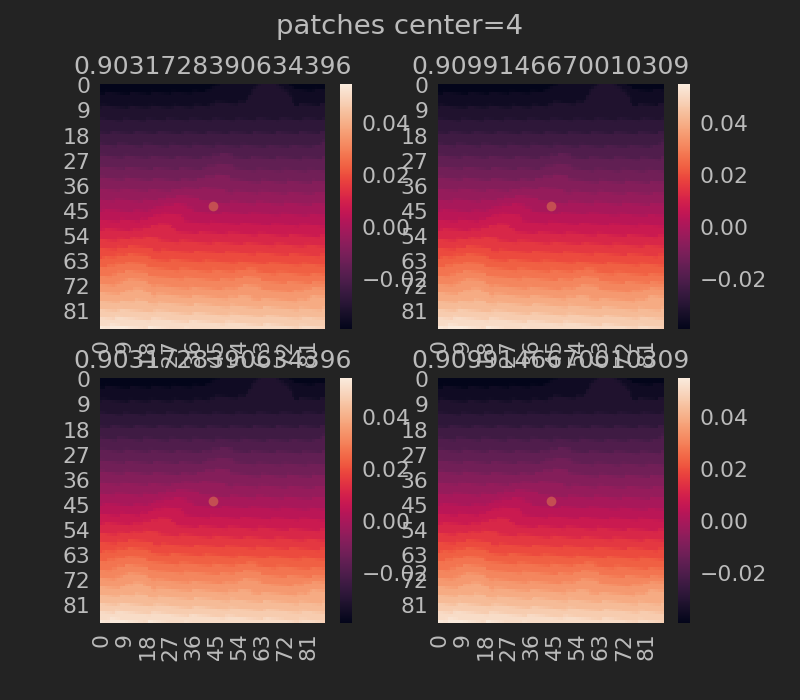

<IPython.core.display.Javascript object>


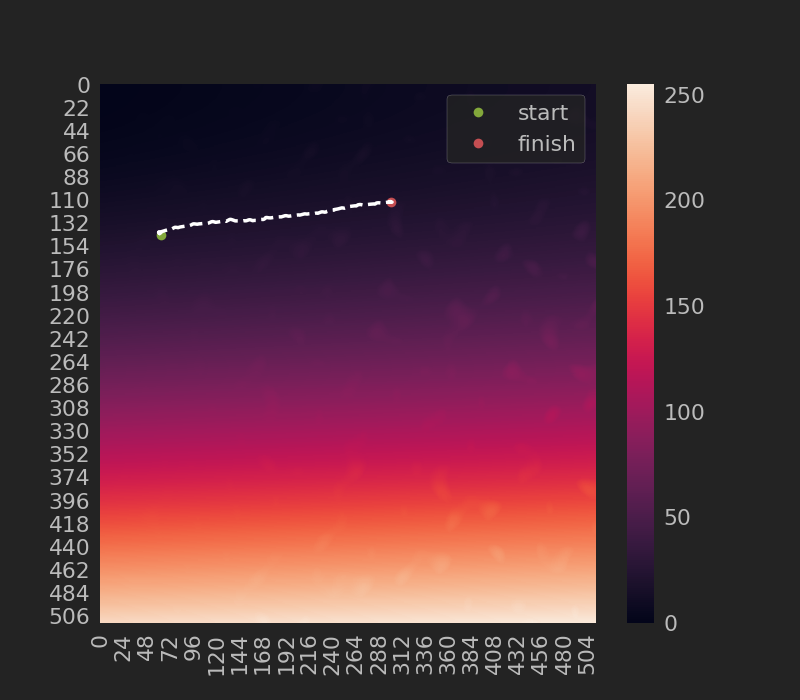

<IPython.core.display.Javascript object>


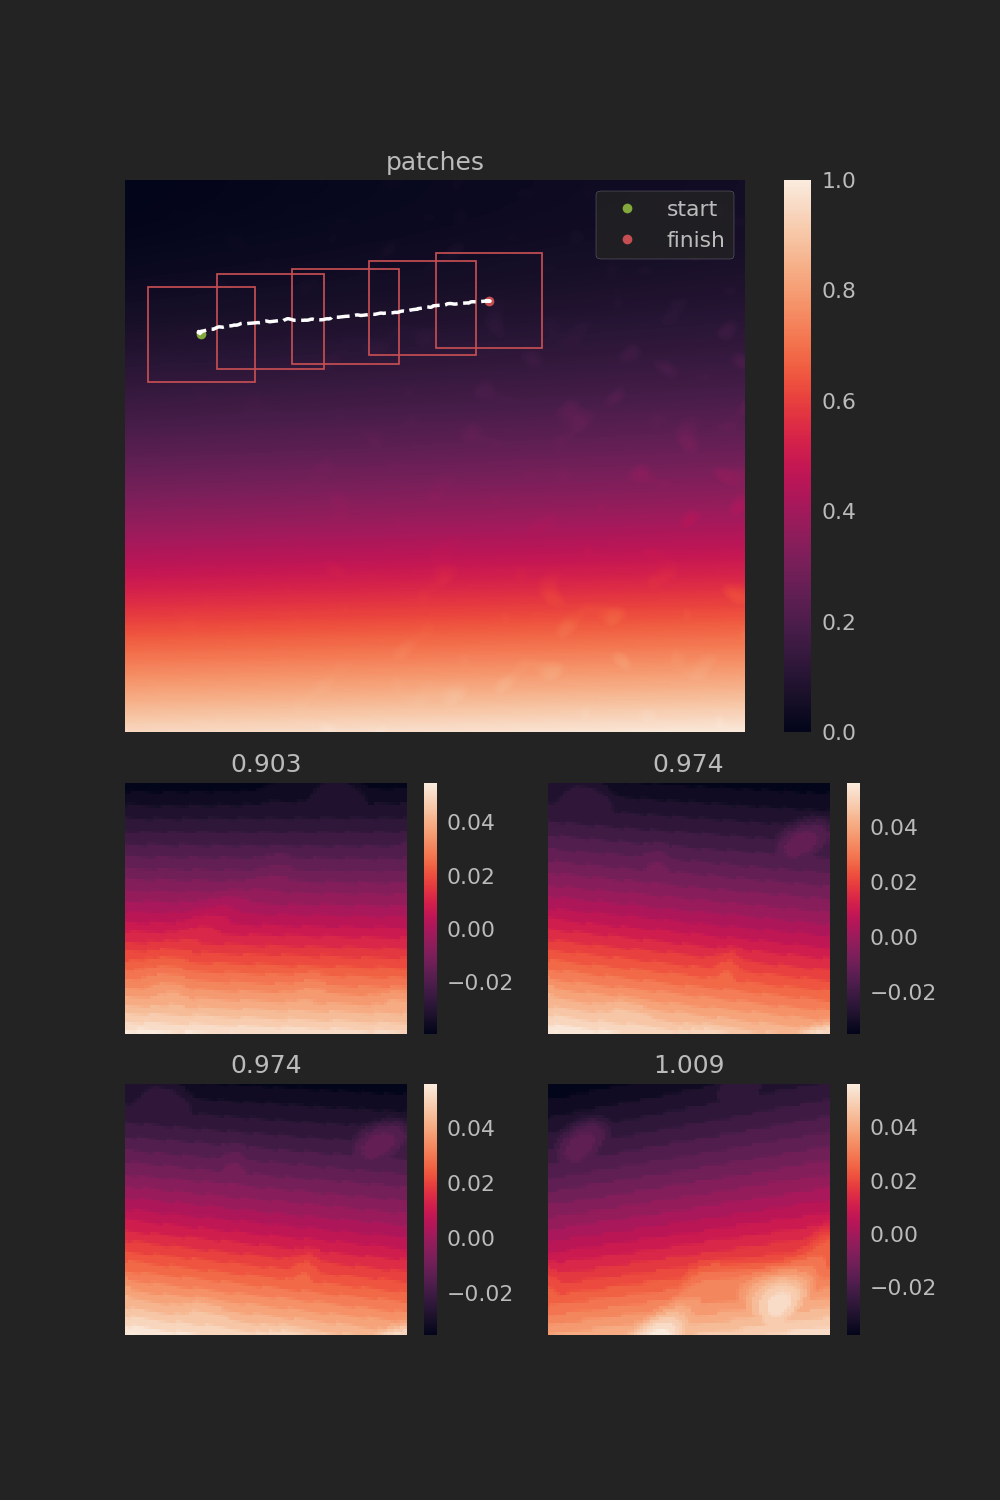

<IPython.core.display.Javascript object>


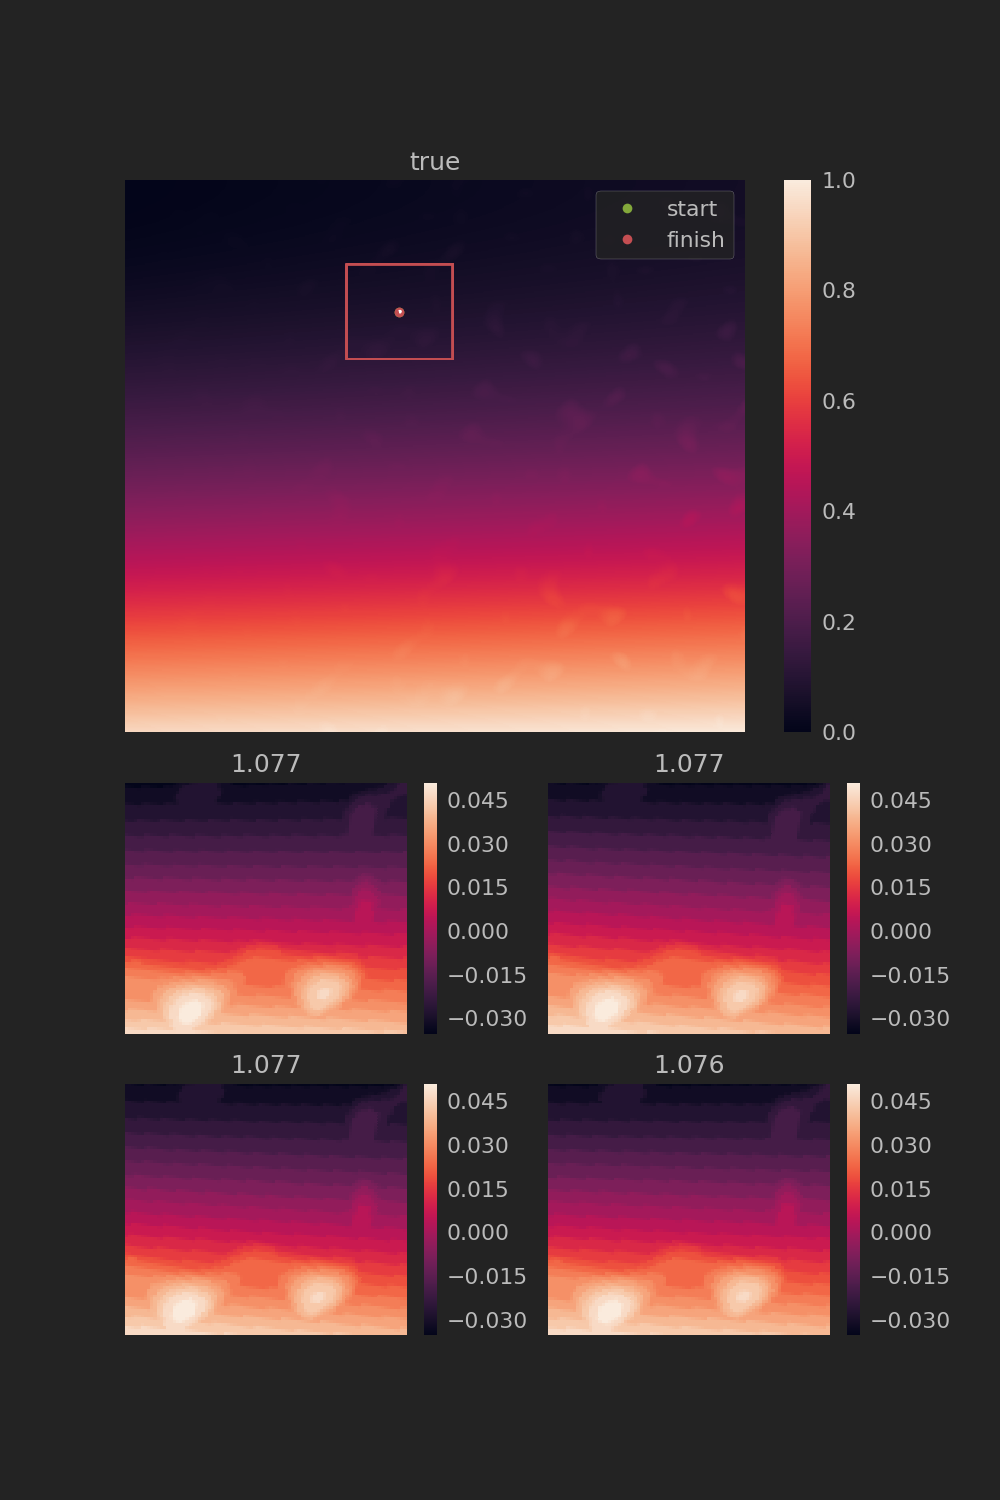

<IPython.core.display.Javascript object>


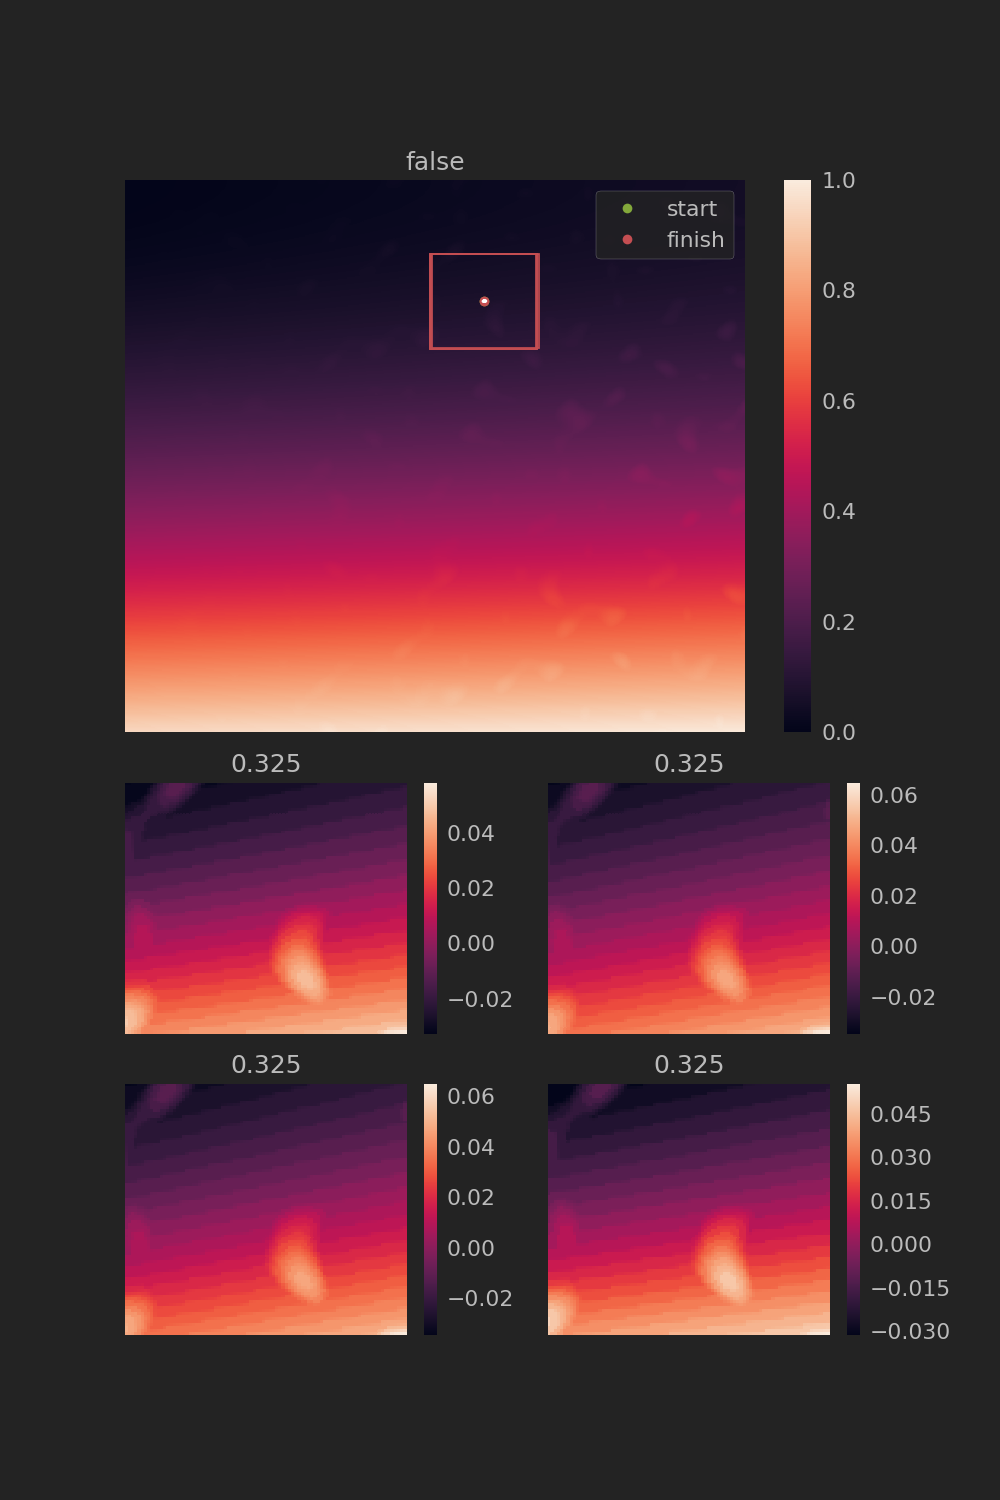

In [11]:

hm = cv2.imread('./maps/train/slope_rocks1.png')
hm = cv2.cvtColor(hm, cv2.COLOR_BGR2GRAY)

vis = PatchesAndDataframeVisualization(dfs[0], hm, 88)
vis.show_patches(4)
vis.show_traces([dfs[0]])
vis.show_patches_on_the_map()
vis.show_labeled_patches(0.45)

<IPython.core.display.Javascript object>


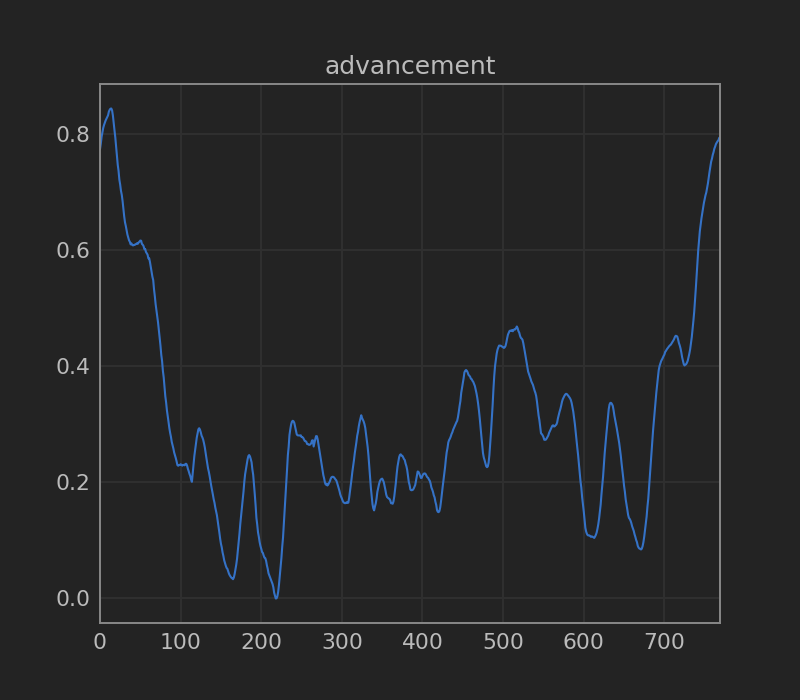

<IPython.core.display.Javascript object>


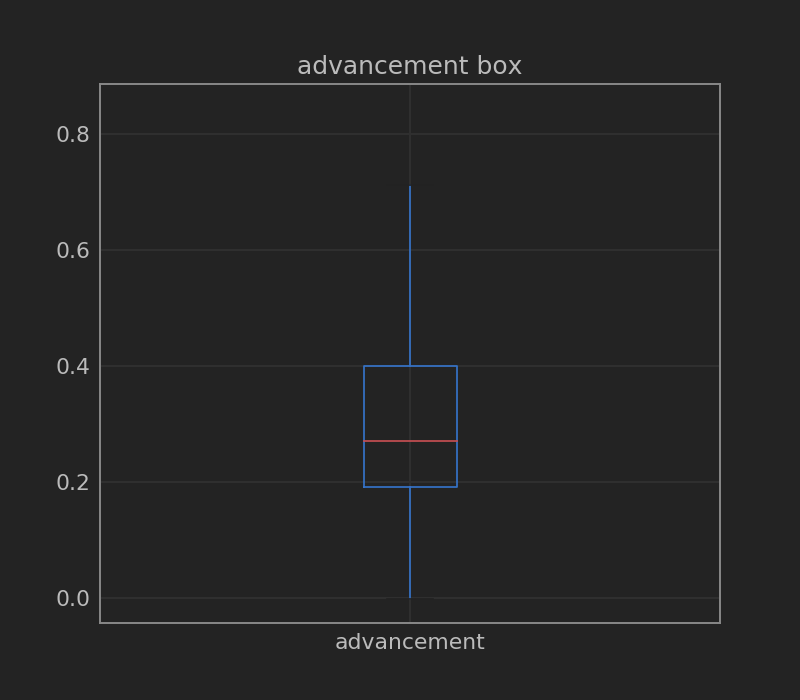

<IPython.core.display.Javascript object>


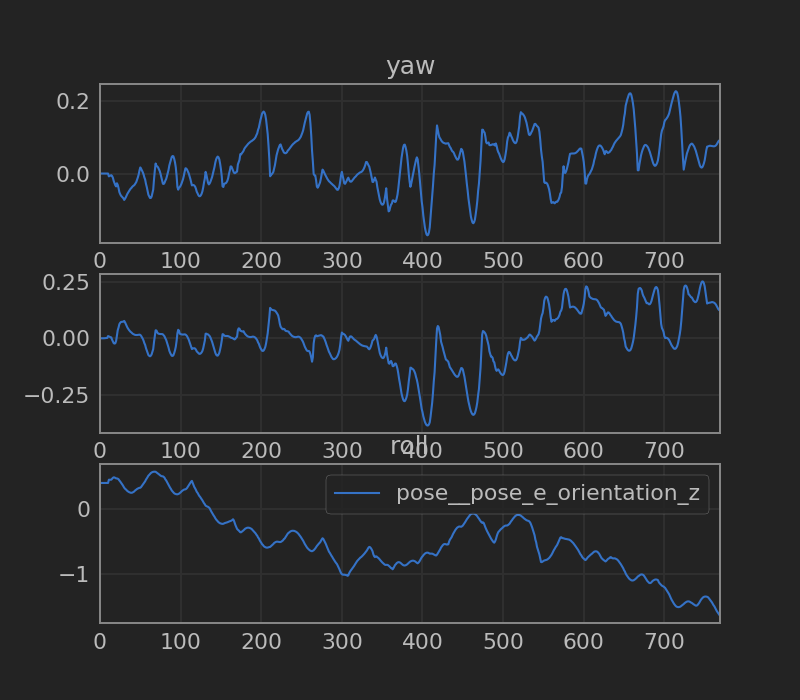

<IPython.core.display.Javascript object>


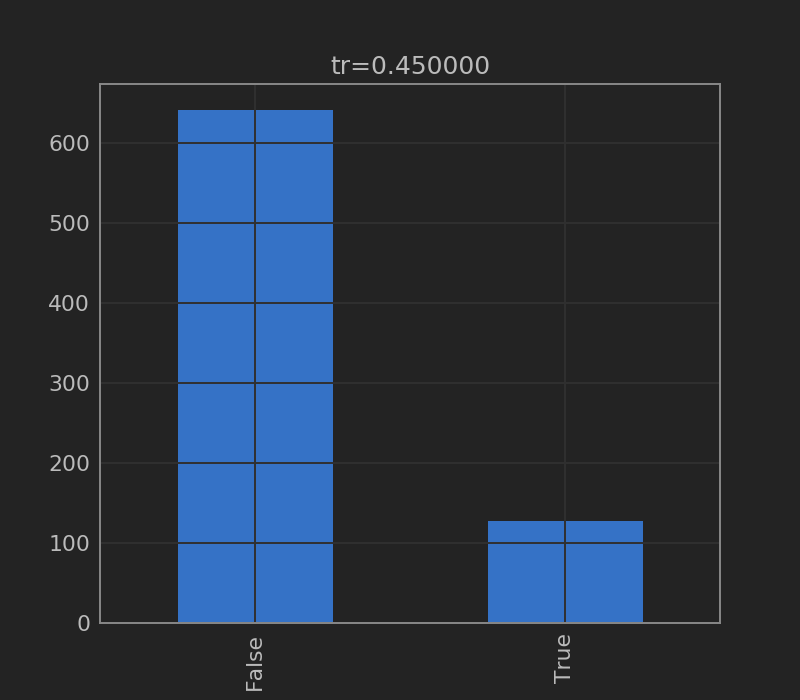

In [25]:
DataFrameVisualization(dfs[0])(0.45)

In [205]:
??PatchesAndDataframeVisualization

<IPython.core.display.Javascript object>


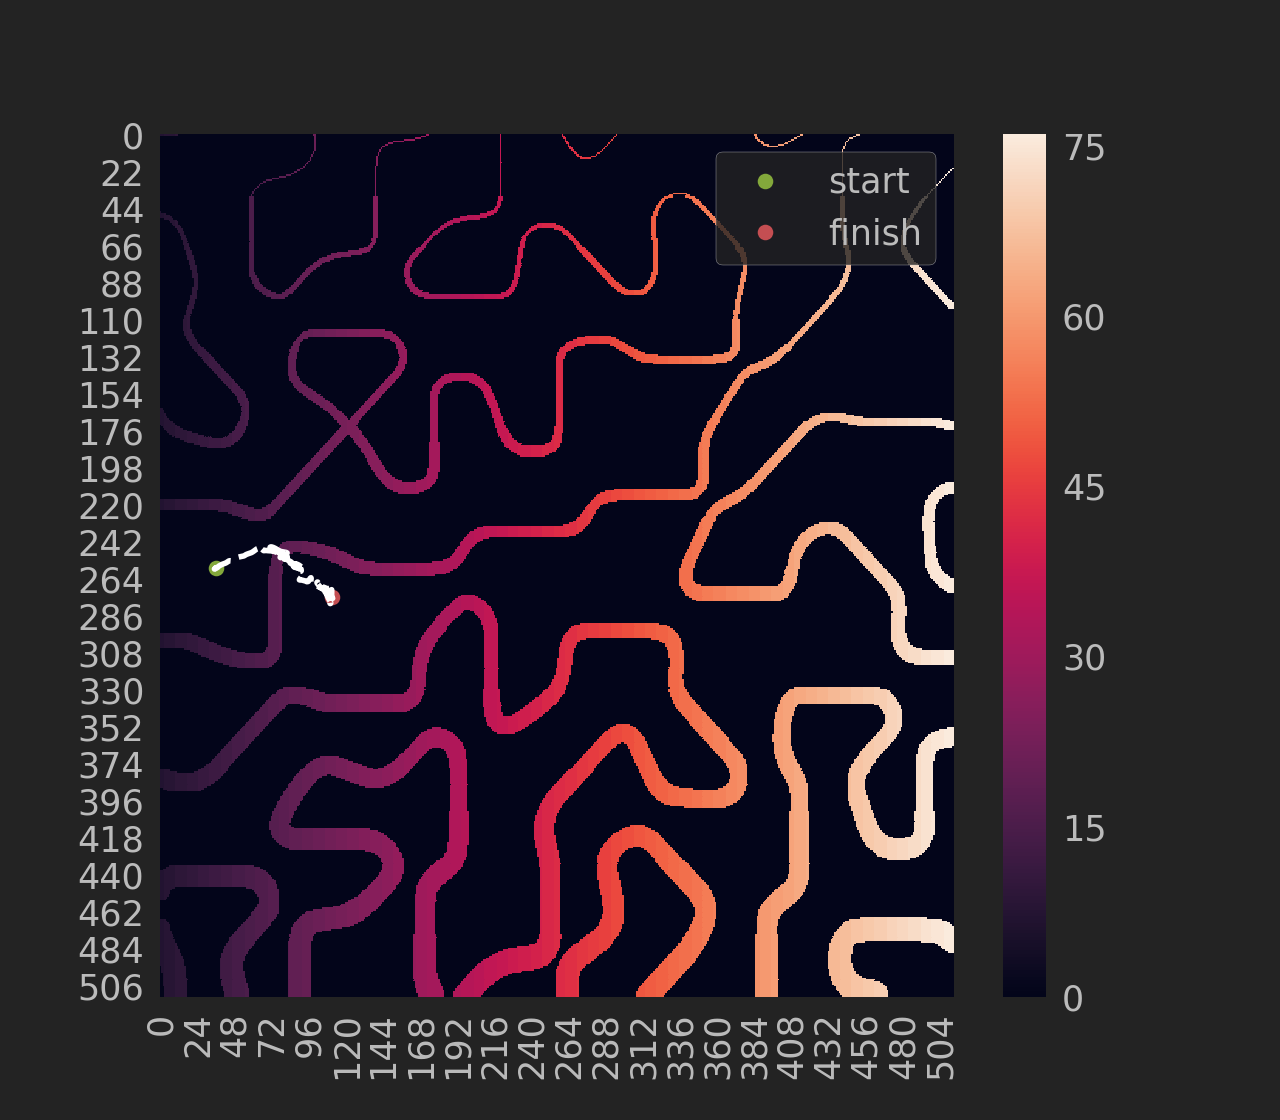

<IPython.core.display.Javascript object>


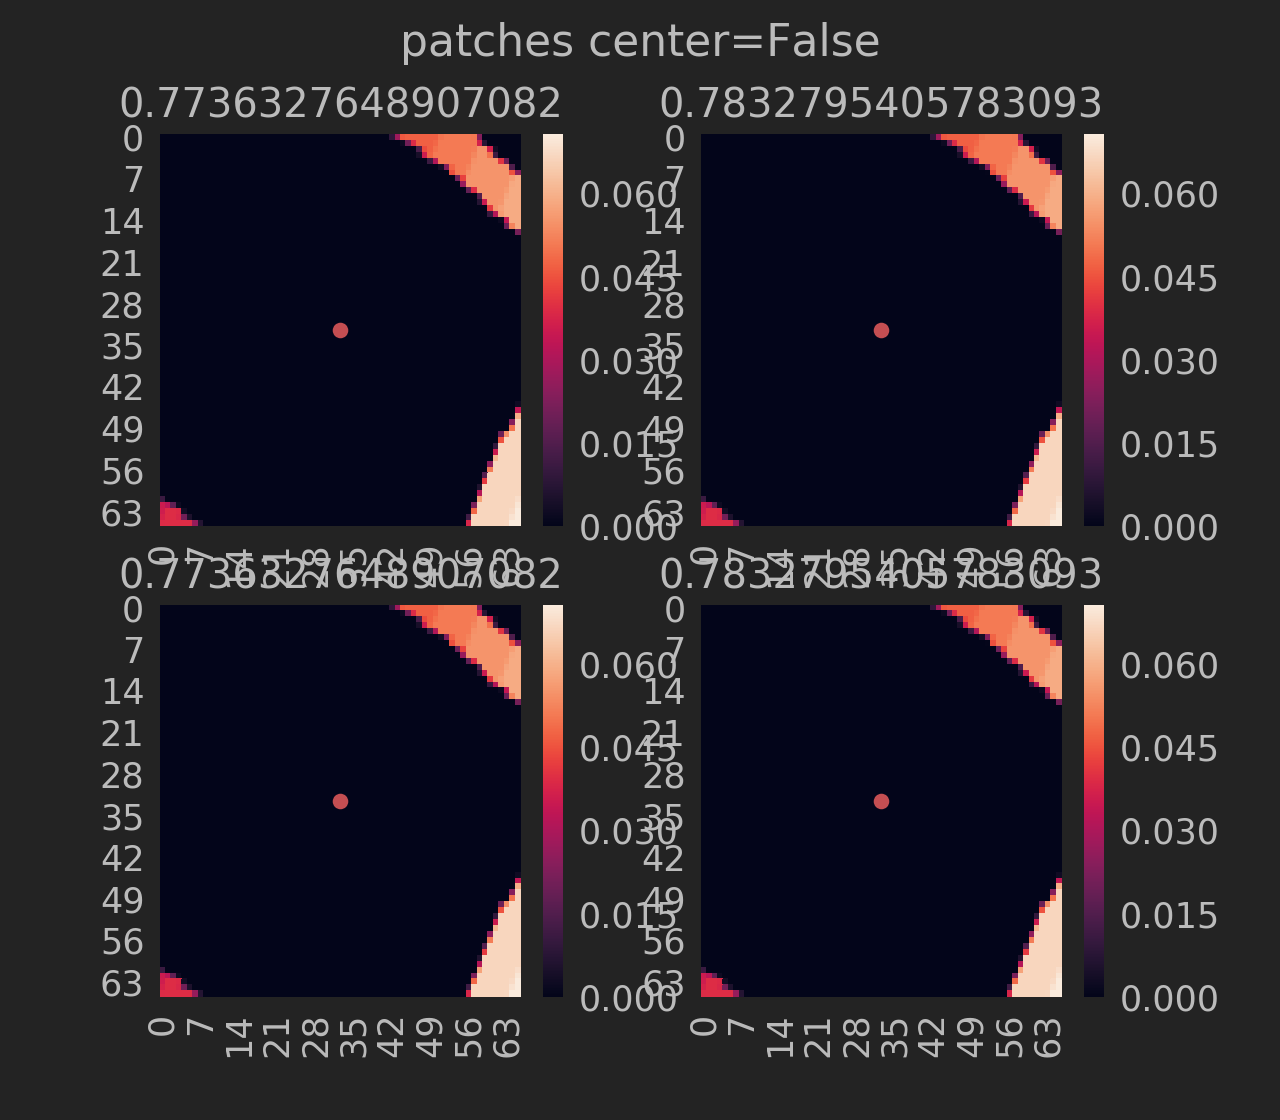

In [198]:
import rosbag
from utilities.postprocessing.postprocessing import *

name = meta[meta['map'] == 'bars1']['filename'].iloc[0]
df = pd.read_csv('/media/francesco/saetta/krock-dataset/train/csvs_patches/{}.csv'.format(name))
hm = cv2.imread('./maps/train/bars1.png')
hm = cv2.cvtColor(hm, cv2.COLOR_BGR2GRAY)

# vis = PatchesAndDataframeVisualization.from_root('/home/francesco/Desktop/querry-down-hill/csvs_patches', hm)

# vis(0.45)
# vis.show_traces([vis.df])
# vis.show_patches_on_the_map()

vis = PatchesAndDataframeVisualization(df, hm, patch_size=66)
vis.show_traces([vis.df])
vis.show_patches()

In [17]:
x, y, alpha = vis.df['hm_x'][0], vis.df['hm_y'][0], np.rad2deg(vis.df['pose__pose_e_orientation_z'][0])

[INFO] patch_size = 80.0
[INFO] missing_krock_body = 0.71
[INFO] offset = (3, 0)


<IPython.core.display.Javascript object>


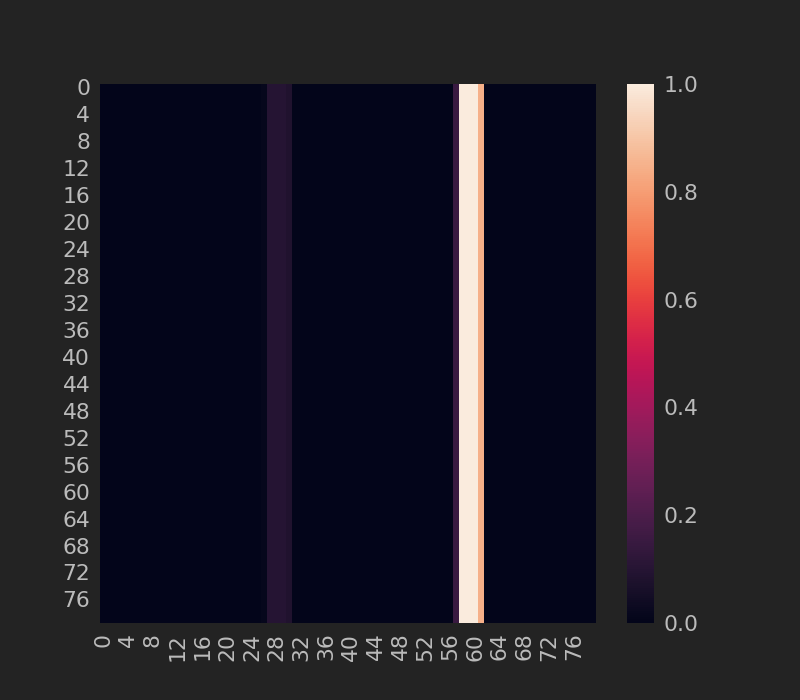

(80, 80)


<IPython.core.display.Javascript object>


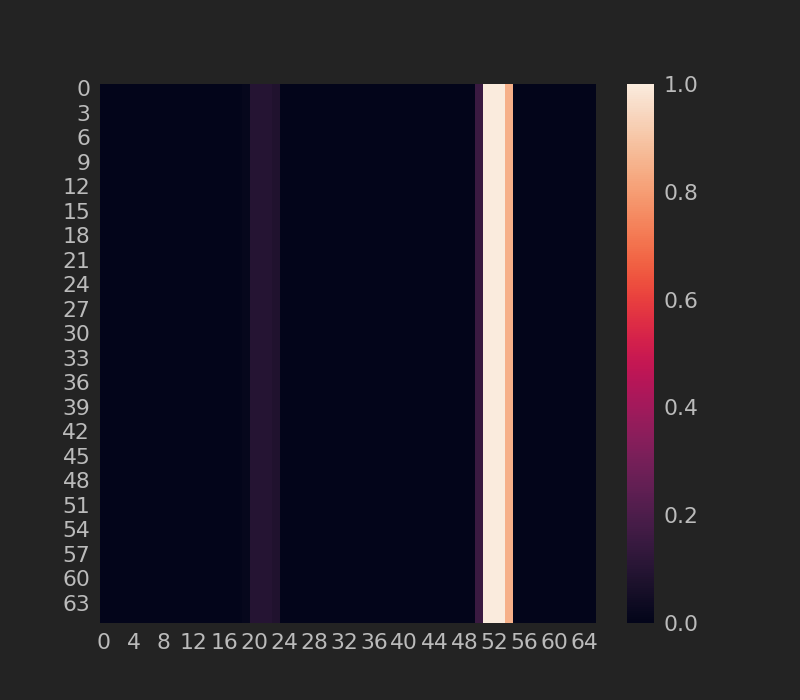

(66, 66)


In [25]:
import seaborn as sns
from utilities.postprocessing.utils import PatchExtractStrategy, KrockPatchExtractStrategy

def imshow(im):
    fig = plt.figure()
    sns.heatmap(im)
    plt.show()
import math 

KROCK_SIZE = 0.85
HEAD_OFFSET = 0.14
RESOLUTION = 0.02
ADVANCEMENT = 0.66


patch, _  = KrockPatchExtractStrategy(ADVANCEMENT)(hm, x, y, 0, debug=True)

imshow(patch)

print(patch.shape)

patch, _  = PatchExtractStrategy((ADVANCEMENT / 0.02) * 2)(hm, x, y, 0)

imshow(patch)
print(patch.shape)


In [13]:
import rosbag
from utilities.postprocessing.postprocessing import *
from utilities.visualisation import *

hm = cv2.imread('/media/francesco/saetta/krock-dataset/test_with_obstacles/wall.png')
hm = cv2.cvtColor(hm, cv2.COLOR_BGR2GRAY)

vis = PatchesAndDataframeVisualization.from_root('/media/francesco/saetta/krock-dataset/test_with_obstacles/csvs_parsed',
                                                 hm,
                                                patch_size=36)

# vis(0.45)
# vis.show_traces([vis.df])
vis.show_patches_on_the_map()

<IPython.core.display.Javascript object>

KeyError: 'advancement'